<a href="https://colab.research.google.com/github/descandon88/Analisis-de-Redes/blob/proyecto/analisis_predictivo_eci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from scipy.stats import pearsonr

from sklearn import metrics
from sklearn.metrics import accuracy_score

import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

In [2]:
from google.colab import drive
drive.mount("/content/drive")
print("conexión con drive listo!")

Mounted at /content/drive
conexión con drive listo!


In [3]:
df_pci = pd.read_csv("/content/drive/MyDrive/eci/base/df_pci.csv")
#df_country = pd.read_csv("/content/drive/MyDrive/eci/base/df_updated.csv")
df_location= pd.read_csv("/content/drive/MyDrive/eci/base/df_updated.csv")
df_country_code= pd.read_csv("/content/drive/MyDrive/eci/base/df_country_code.csv")

In [ ]:
df_country_code.head()

,location_id,country_code,country_name
0,0,ABW,Aruba
1,1,AFG,Afghanistan
2,2,AGO,Angola
3,3,AIA,Anguilla
4,4,ALB,Albania


In [ ]:
df_pci.head()

,country_name,product_code,export_value,year,pci,eci
0,Afghanistan,6805,1327,1995,3.005267,-0.330378
1,Afghanistan,9204,0,1995,3.880273,-0.330378
2,Afghanistan,2911,0,1995,3.770268,-0.330378
3,Afghanistan,2918,0,1995,2.371247,-0.330378
4,Afghanistan,2917,0,1995,1.504703,-0.330378


In [4]:
result_pci_country_code = pd.merge(df_country_code, df_pci , on="country_name")

#df=df_pci.copy()
#df.tail()
df_new = result_pci_country_code.copy()
df_new.head()

,location_id,country_code,country_name,product_code,export_value,year,pci,eci
0,0,ABW,Aruba,6805,0,1995,3.005267,-0.149358
1,0,ABW,Aruba,9204,0,1995,3.880273,-0.149358
2,0,ABW,Aruba,2911,0,1995,3.770268,-0.149358
3,0,ABW,Aruba,2918,0,1995,2.371247,-0.149358
4,0,ABW,Aruba,2917,0,1995,1.504703,-0.149358


#####Elimino los productos que no se exportaron

In [5]:
#df["country_name"].hist(bins=15, figsize=(20, 20), layout=(2, 4));
df_c = df_new[df_new.export_value != 0].copy()
print("Se eliminan los productos que no se exportaron!")
#df_uy = df_c.loc[df["country_name"] == "Uruguay"]
#print("uruguay seleccionado! ")
#sns.scatterplot(x=df_uy['year'], y=df_uy['eci'])

column_names = ["location_id", "country_code", "country_name","product_code","export_value","year","eci","pci"]
print("Se reordenan el orden de las columnas")

df_c = df_c.reindex(columns=column_names)
df_c.head()

Se eliminan los productos que no se exportaron!
Se reordenan el orden de las columnas


,location_id,country_code,country_name,product_code,export_value,year,eci,pci
14,0,ABW,Aruba,8415,127324,1995,-0.149358,1.527974
30,0,ABW,Aruba,7612,141979,1995,-0.149358,2.224087
35,0,ABW,Aruba,7616,28035,1995,-0.149358,1.868267
57,0,ABW,Aruba,106,2336,1995,-0.149358,-2.112441
70,0,ABW,Aruba,4206,41677,1995,-0.149358,0.464937


In [ ]:
df_c.dropna(inplace=True)

In [68]:
#df_c.columns = df_c.columns.droplevel(0)

#df2 = pd.melt(df_c,id_vars=['location_id','product_code','export_value','eci']).copy()
df2 = (df_c.pivot_table(index=['location_id','product_code'], columns='year',
                        values=['eci']).reset_index()
                        ).copy()
df3 = (df_c.pivot_table(index=['location_id','product_code'], columns='year',
                        values=['pci']).reset_index()
                        ).copy()


In [69]:

df2=df2.fillna(0)
df3=df3.fillna(0)

df2.columns.set_levels(['eci_1995', 'eci_1996', 'eci_1997', 'eci_1998',
                        'eci_1999','eci_2000','eci_2001','eci_2002',
                        'eci_2003','eci_2004','eci_2005','eci_2006',
                        'eci_2007', 'eci_2008','eci_2009','eci_2010',
                        'eci_2011', 'eci_2012','eci_2013','eci_2014',
                       'eci_2015','eci_2016','eci_2017', 'eci_2018',
                         'eci_2019','eci_2020','location_id','product_code',
                        ],level=1,inplace=True)

df3.columns.set_levels(['pci_1995', 'pci_1996', 'pci_1997','pci_1998',
                        'pci_1999','pci_2000','pci_2001','pci_2002',
                        'pci_2003','pci_2004','pci_2005','pci_2006',
                        'pci_2007', 'pci_2008','pci_2009','pci_2010',
                        'pci_2011', 'pci_2012','pci_2013','pci_2014',
                       'pci_2015','pci_2016','pci_2017', 'pci_2018',
                         'pci_2019','pci_2020','location_id','product_code',
                        ],level=1,inplace=True)

#df2.sample(n=10)
df3.head(6)

location_id product_code       pci  ...                              
year location_id  location_id  pci_1995  ...  pci_2018  pci_2019  pci_2020
0              0          101  1.204200  ...  0.300759  0.968301  1.022077
1              0          102  0.000000  ...  0.000000  0.000000  0.000000
2              0          104  0.000000  ...  0.000000  0.000000  0.000000
3              0          105  0.000000  ...  0.946808  0.843696  0.552820
4              0          106 -2.112441  ... -1.838082 -1.546296 -0.967672
5              0          201  0.000000  ...  0.000000  0.000000  0.000000

[6 rows x 28 columns]

In [201]:
df2.columns = df2.columns.get_level_values(0)
df3.columns = df3.columns.get_level_values(0)

df_cols_eci = ['location_id','product_code','eci_1995', 'eci_1996', 'eci_1997', 'eci_1998',
                        'eci_1999','eci_2000','eci_2001','eci_2002',
                        'eci_2003','eci_2004','eci_2005','eci_2006',
                        'eci_2007', 'eci_2008','eci_2009','eci_2010',
                        'eci_2011', 'eci_2012','eci_2013','eci_2014',
                       'eci_2015','eci_2016','eci_2017', 'eci_2018',
                         'eci_2019','eci_2020'] #debo borrar esto

df_cols_pci = ['location_id','product_code','pci_1995', 'pci_1996', 'pci_1997', 'pci_1998',
                        'pci_1999','pci_2000','pci_2001','pci_2002',
                        'pci_2003','pci_2004','pci_2005','pci_2006',
                        'pci_2007', 'pci_2008','pci_2009','pci_2010',
                        'pci_2011', 'pci_2012','pci_2013','pci_2014',
                       'pci_2015','pci_2016','pci_2017', 'pci_2018',
                         'pci_2019','pci_2020']                         


df2.columns = df_cols_eci.copy()
df2=df2.drop(columns=['eci_2019', 'eci_2020'])
df3.columns = df_cols_pci.copy()
df3=df3.drop(columns=['pci_2020'])

df3.head()

,location_id,product_code,pci_1995,pci_1996,pci_1997,pci_1998,pci_1999,pci_2000,pci_2001,pci_2002,pci_2003,pci_2004,pci_2005,pci_2006,pci_2007,pci_2008,pci_2009,pci_2010,pci_2011,pci_2012,pci_2013,pci_2014,pci_2015,pci_2016,pci_2017,pci_2018,pci_2019
0,0,101,1.204200,0.0,0.0,0.0,0.954775,0.000000,1.019034,1.277552,1.358104,0.000000,0.249181,0.490051,0.474802,0.394135,-0.173839,0.000000,1.121265,-0.199836,0.826207,0.091668,0.049549,0.000000,1.284984,0.300759,0.968301
1,0,102,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.806104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,104,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.411759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,105,0.000000,0.0,0.0,0.0,1.197645,0.000000,0.000000,0.000000,0.000000,-0.078471,0.000000,0.000000,0.000000,1.246119,1.189713,0.798086,0.599276,0.752623,0.956265,0.747184,0.698812,1.069564,0.682853,0.946808,0.843696
4,0,106,-2.112441,0.0,0.0,0.0,0.000000,-1.911484,0.000000,0.000000,0.000000,0.000000,-2.178663,-2.244232,-2.111827,0.000000,-2.217669,-2.307964,-2.640437,-1.334829,0.000000,-1.714427,-2.145250,-1.680247,-1.441735,-1.838082,-1.546296


In [217]:
df_t = pd.merge(df2, df3, on=["location_id","product_code"])
df_t.head()


,location_id,product_code,eci_1995,eci_1996,eci_1997,eci_1998,eci_1999,eci_2000,eci_2001,eci_2002,eci_2003,eci_2004,eci_2005,eci_2006,eci_2007,eci_2008,eci_2009,eci_2010,eci_2011,eci_2012,eci_2013,eci_2014,eci_2015,eci_2016,eci_2017,eci_2018,pci_1995,pci_1996,pci_1997,pci_1998,pci_1999,pci_2000,pci_2001,pci_2002,pci_2003,pci_2004,pci_2005,pci_2006,pci_2007,pci_2008,pci_2009,pci_2010,pci_2011,pci_2012,pci_2013,pci_2014,pci_2015,pci_2016,pci_2017,pci_2018,pci_2019
0,0,101,-0.149358,0.0,0.0,0.0,0.006876,0.000000,0.141701,-0.189418,-0.199274,0.000000,0.256492,0.067235,-0.018397,-0.02665,0.677349,0.000000,-0.358337,0.244023,0.705739,0.778916,0.735923,0.000000,0.86745,0.929084,1.204200,0.0,0.0,0.0,0.954775,0.000000,1.019034,1.277552,1.358104,0.000000,0.249181,0.490051,0.474802,0.394135,-0.173839,0.000000,1.121265,-0.199836,0.826207,0.091668,0.049549,0.000000,1.284984,0.300759,0.968301
1,0,102,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.199274,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.806104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,104,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.705739,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.411759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,105,0.000000,0.0,0.0,0.0,0.006876,0.000000,0.000000,0.000000,0.000000,-0.468775,0.000000,0.000000,0.000000,-0.02665,0.677349,1.086779,-0.358337,0.244023,0.705739,0.778916,0.735923,0.974295,0.86745,0.929084,0.000000,0.0,0.0,0.0,1.197645,0.000000,0.000000,0.000000,0.000000,-0.078471,0.000000,0.000000,0.000000,1.246119,1.189713,0.798086,0.599276,0.752623,0.956265,0.747184,0.698812,1.069564,0.682853,0.946808,0.843696
4,0,106,-0.149358,0.0,0.0,0.0,0.000000,0.312097,0.000000,0.000000,0.000000,0.000000,0.256492,0.067235,-0.018397,0.00000,0.677349,1.086779,-0.358337,0.244023,0.000000,0.778916,0.735923,0.974295,0.86745,0.929084,-2.112441,0.0,0.0,0.0,0.000000,-1.911484,0.000000,0.000000,0.000000,0.000000,-2.178663,-2.244232,-2.111827,0.000000,-2.217669,-2.307964,-2.640437,-1.334829,0.000000,-1.714427,-2.145250,-1.680247,-1.441735,-1.838082,-1.546296


###Variables dependientes
#####Asigno la variable pci como variable dependiente

In [226]:
#Y = df_c['pci'].values
#Y = df_c.iloc[:,7].values
Y = df_t.iloc[:,50].values
Y 

array([ 0.96830111,  0.        ,  0.        , ..., -0.26607276,
       -1.42070182,  0.8026207 ])

###Definiendo variables independientes

In [230]:

#X = df_c.drop(labels=["country_name","country_code"],axis=1).copy()
X = df_t.copy()
X = X.iloc[:,0:50].values
df_x = pd.DataFrame(X)
X[0,49]

0.3007590448392741

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,random_state=1)

In [232]:
#print(X_test)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print(X_train[:2, :])

(156416, 50) (77041, 50) (156416,) (77041,)
[[ 1.71000000e+02  8.71400000e+03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.06045835e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.33183031e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.08000000e+02  3.30500000e+03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [79]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
#Y = sc.transform(Y)
Y_test = sc.transform(X_test)

###Model Random Forest Regression

In [233]:
from sklearn.ensemble import RandomForestRegressor

#model = RandomForestRegressor(n_estimators=10, random_state=30)
#model = RandomForestRegressor(n_estimators=50, random_state=0, bootstrap=True)
regressor = RandomForestRegressor(n_estimators=100, random_state=1)



In [234]:
regressor.fit(X_train,Y_train)


RandomForestRegressor(random_state=1)

##CHECK OUT

In [235]:
from sklearn.metrics import mean_absolute_error
y_pred=regressor.predict(X_test)
#y_pred=regressor.predict(X)
mae = mean_absolute_error(Y_test, y_pred)
print('MAE: %.3f' % mae)

MAE: 0.261


In [210]:
print(y_pred.shape)
print(y_pred)
y_pred[4]

(77041,)
[0.07017222 3.66563451 2.04225348 ... 0.54892662 1.85767034 0.68716364]


0.8447588151186818

In [236]:
regressor.feature_importances_


array([0.01158749, 0.01424045, 0.0017098 , 0.00198927, 0.00192923,
       0.00194139, 0.00195229, 0.00198911, 0.00212577, 0.00218366,
       0.00225337, 0.00211221, 0.00220401, 0.0023796 , 0.00226047,
       0.0023706 , 0.00263243, 0.00242944, 0.0025058 , 0.00296192,
       0.00253282, 0.00240682, 0.00231558, 0.00243147, 0.00226514,
       0.00271462, 0.00291338, 0.00307092, 0.00293062, 0.00294914,
       0.00335735, 0.00362068, 0.00378025, 0.00436702, 0.00431314,
       0.0043188 , 0.00493221, 0.00586314, 0.00645347, 0.00633461,
       0.00632814, 0.00686251, 0.00813085, 0.00805625, 0.01425139,
       0.01691404, 0.02812559, 0.01800026, 0.11099258, 0.64270892])

Text(0, 0.5, 'Variables')

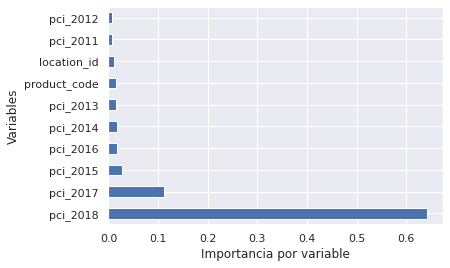

In [246]:
#plt.barh(, regressor.feature_importances_)
#features_names=list(df_t.columns)
#plt.bhdf_t.features_names
#plt.barh(features_names, regressor.feature_importances_)
features=list(df_t[['location_id','product_code','eci_1995', 'eci_1996', 'eci_1997', 'eci_1998',
                        'eci_1999','eci_2000','eci_2001','eci_2002',
                        'eci_2003','eci_2004','eci_2005','eci_2006',
                        'eci_2007', 'eci_2008','eci_2009','eci_2010',
                        'eci_2011', 'eci_2012','eci_2013','eci_2014',
                       'eci_2015','eci_2016','eci_2017', 'eci_2018',
                       'pci_1995', 'pci_1996', 'pci_1997',
                       'pci_1998','pci_1999','pci_2000','pci_2001','pci_2002',
                        'pci_2003','pci_2004','pci_2005','pci_2006',
                        'pci_2007', 'pci_2008','pci_2009','pci_2010',
                        'pci_2011', 'pci_2012','pci_2013','pci_2014',
                       'pci_2015','pci_2016','pci_2017','pci_2018']])

feat_importances = pd.Series(regressor.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Importancia por variable")
plt.ylabel("Variables")



In [ ]:
from matplotlib import pyplot
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [238]:
pci_pred_2019 = pd.DataFrame(y_pred,columns=["pci_pred_2019"])

In [184]:
pci_pred_2019

,pci_pred_2019
0,0.078352
1,3.665635
2,2.042253
3,1.954052
4,0.844759
...,...
77036,0.000000
77037,0.000000
77038,0.000000
77039,1.857670


In [239]:
#y_test=pd.DataFrame(Y_test,columns=["Y_test"])
#pci_current_2019=pd.DataFrame(Y,columns=["pci_current_2019"])
pci_current_2019=pd.DataFrame(Y_test,columns=["pci_current_2019"])
pci_current_2019
#Y_test.shape

,pci_current_2019
0,0.076863
1,3.665635
2,2.042253
3,1.952335
4,0.844759
...,...
77036,0.000000
77037,0.000000
77038,0.000000
77039,1.857670


###Scatter Plot de Y_test vs Y_predicted

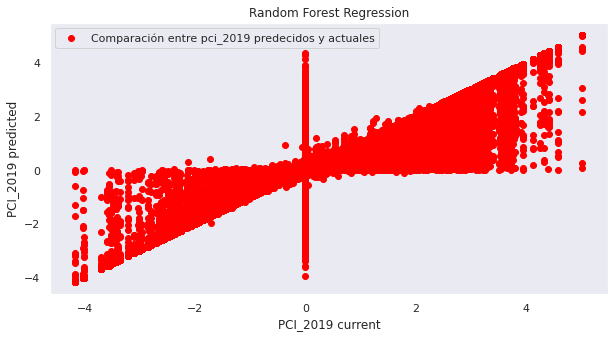

In [249]:
plt.figure(figsize=(10,5))
plt.scatter(pci_current_2019, pci_pred_2019, color= "red", label ="Comparación entre pci_2019 predecidos y actuales")
plt.legend()
plt.grid()
plt.title("Random Forest Regression")
plt.xlabel("PCI_2019 current")
plt.ylabel("PCI_2019 predicted")
plt.show()

In [255]:
#metrics.r2_score(pci_current_2019,pci_pred_2019)
metrics.r2_score(Y_test,y_pred)



0.8296653000694256

In [252]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(pci_current_2019, pci_pred_2019))
print('Mean Squared Error:', metrics.mean_squared_error(pci_current_2019, pci_pred_2019))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(pci_current_2019, pci_pred_2019)))



Mean Absolute Error: 0.2612613790573767
Mean Squared Error: 0.2897687778615758
Root Mean Squared Error: 0.5383017535375264


In [ ]:
from sklearn.tree import plot_tree

#from dtreeviz.trees import dtreeviz # will be used for tree visualization

plt.figure(figsize=(20,20))
plot_tree(regressor.estimators_[0], feature_names=df_x.columns,class_names=[] filled=True)

In [ ]:
_ = tree.plot_tree(regressor.estimators_[0], feature_names=df_c.columns, filled=True)


ValueError: ignored

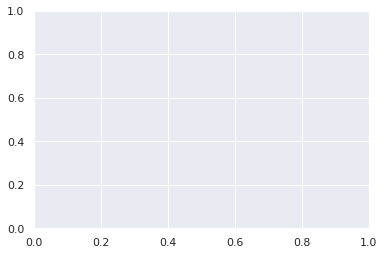

In [254]:
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_train
# Build scatterplot
plt.scatter(x_axis, Y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('pci_2019')
plt.ylabel('pci_2019')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

9999.0

### librerias a considerar: LightGBM ###
### https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
### https://lightgbm.readthedocs.io/en/latest/index.html
### https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

In [ ]:
!pip install lightgbm